<a href="https://colab.research.google.com/github/andrew66882011/100-plus-python-coding-problems-with-solutions/blob/master/00_latex_output_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## imports
import pandas as pd
import numpy as np
import plotnine
from plotnine import *
import random

## print multiple things from same cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Example code
### Load data

In [2]:
## load data on 2020 crimes in DC
dc_crim_2020 = pd.read_csv("https://opendata.arcgis.com/datasets/f516e0dd7b614b088ad781b0c4002331_2.csv")
dc_crim_2020.head()
dc_crim_2020.shape
dc_crim_2020.info()

,X,Y,CCN,REPORT_DAT,SHIFT,METHOD,OFFENSE,BLOCK,XBLOCK,YBLOCK,WARD,ANC,DISTRICT,PSA,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,LATITUDE,LONGITUDE,BID,START_DATE,END_DATE,OBJECTID,OCTO_RECORD_ID
0,-77.023981,38.900345,5370,2020/01/17 02:39:05+00,EVENING,OTHERS,THEFT F/AUTO,800 - 899 BLOCK OF 9TH STREET NW,397920.0,136943.0,2,2C,2.0,209.0,Cluster 8,005800 1,5800.0,Precinct 129,38.900337,-77.023979,DOWNTOWN,2020/01/11 02:48:51+00,2020/01/17 02:48:54+00,611426356,00005370-01
1,-77.030788,38.911874,16641,2020/01/28 05:14:39+00,MIDNIGHT,OTHERS,THEFT F/AUTO,1300 - 1399 BLOCK OF CORCORAN STREET NW,397330.0,138223.0,2,2F,3.0,307.0,Cluster 7,005001 2,5001.0,Precinct 16,38.911866,-77.030785,NaN,2020/01/28 05:14:58+00,2020/01/28 05:15:02+00,611426357,00016641-01
2,-76.972226,38.854086,10147537,2020/12/21 05:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,2300 - 2499 BLOCK OF HARTFORD STREET SE,402411.0,131808.0,8,8B,7.0,702.0,Cluster 36,007408 1,7408.0,Precinct 115,38.854078,-76.972223,NaN,2010/10/10 02:00:00+00,1970/01/01 00:00:00+00,611516040,10147537-01
3,-76.972651,38.857491,10251445,2020/09/11 04:00:00+00,MIDNIGHT,GUN,HOMICIDE,2300 - 2399 BLOCK OF AINGER PLACE SE,402374.0,132186.0,8,8B,7.0,701.0,Cluster 36,007502 1,7502.0,Precinct 134,38.857483,-76.972648,NaN,2010/09/02 04:00:00+00,2010/09/02 04:00:00+00,611522983,10251445-01
4,-77.044182,38.905654,11139598,2020/08/24 04:00:00+00,MIDNIGHT,OTHERS,HOMICIDE,1900 - 1999 BLOCK OF M STREET NW,396168.0,137533.0,2,2B,2.0,207.0,Cluster 6,010700 1,10700.0,Precinct 17,38.905646,-77.044180,GOLDEN TRIANGLE,2011/09/23 06:40:00+00,1970/01/01 00:00:00+00,611547325,11139598-01


(27869, 25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27869 entries, 0 to 27868
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   X                     27869 non-null  float64
 1   Y                     27869 non-null  float64
 2   CCN                   27869 non-null  int64  
 3   REPORT_DAT            27869 non-null  object 
 4   SHIFT                 27869 non-null  object 
 5   METHOD                27869 non-null  object 
 6   OFFENSE               27869 non-null  object 
 7   BLOCK                 27869 non-null  object 
 8   XBLOCK                27869 non-null  float64
 9   YBLOCK                27869 non-null  float64
 10  WARD                  27869 non-null  int64  
 11  ANC                   27869 non-null  object 
 12  DISTRICT              27868 non-null  float64
 13  PSA                   27868 non-null  float64
 14  NEIGHBORHOOD_CLUSTER  27859 non-null  object 
 15  BLOCK_GROUP        

### Example of creating a table to export to latex

In [3]:
method_v_offense = pd.crosstab(dc_crim_2020.METHOD, 
                              dc_crim_2020.OFFENSE)
method_v_offense

## method 1- transpose and print a table to console to copy/paste
print(method_v_offense.T.to_latex(index = False, caption = "Types of weapons in offenses",
                                 label = "tab:method_offense"))

## method 2- write .tex to folder and upload to overleaf/reference the tex file directly 
method_v_offense.T.to_latex("methodoffense.tex", 
                            index = False, caption = "Types of weapons in offenses",
                            label = "tab:method_offense_written")


## for method 2, if working with latex locally, can also then
## just reference the filepath directly rather than uploading to overleaf

OFFENSE,ARSON,ASSAULT W/DANGEROUS WEAPON,BURGLARY,HOMICIDE,MOTOR VEHICLE THEFT,ROBBERY,SEX ABUSE,THEFT F/AUTO,THEFT/OTHER
METHOD,,,,,,,,,
GUN,0,842,7,170,3,982,8,0,1
KNIFE,0,481,0,9,0,122,10,0,0
OTHERS,13,300,1437,18,3253,890,155,8267,10901


\begin{table}
\centering
\caption{Types of weapons in offenses}
\label{tab:method_offense}
\begin{tabular}{rrr}
\toprule
 GUN &  KNIFE &  OTHERS \\
   0 &      0 &      13 \\
\midrule
 842 &    481 &     300 \\
   7 &      0 &    1437 \\
 170 &      9 &      18 \\
   3 &      0 &    3253 \\
 982 &    122 &     890 \\
   8 &     10 &     155 \\
   0 &      0 &    8267 \\
   1 &      0 &   10901 \\
\bottomrule
\end{tabular}
\end{table}



### Example of creating a figure to export

,SHIFT,OCTO_RECORD_ID
0,DAY,10079
1,EVENING,12297
2,MIDNIGHT,5493


/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


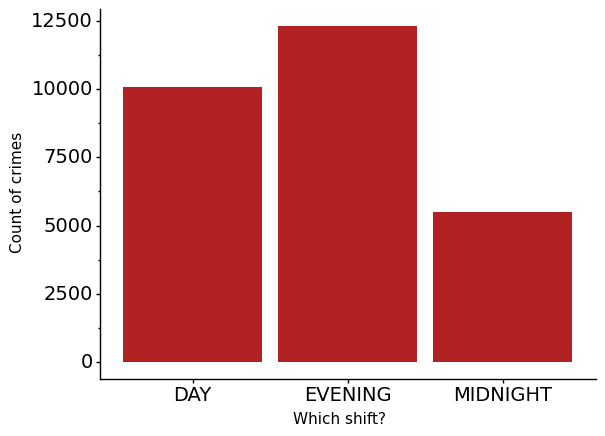

<ggplot: (8772818184261)>

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


In [4]:
## create a fig with the count of crimes by shift 

count_byshift = pd.DataFrame(dc_crim_2020.groupby('SHIFT')['OCTO_RECORD_ID'].nunique()).reset_index()
count_byshift

plot_shifts = (ggplot(count_byshift, aes(x = 'SHIFT', 
                                       y = 'OCTO_RECORD_ID')) +
            geom_bar(stat = "identity", fill = "firebrick") +
            theme_classic() +
            xlab("Which shift?") +
            ylab("Count of crimes") +
            theme(axis_text = element_text(size = 14, color = "black")))
plot_shifts

## method 1- (would avoid)- can left click and save image

## method 2 - write image
plot_shifts.save("plot_shifts.png", 
                width = 12,
                height = 8,
                verbose = False)

## Activity

You decide the table is only informative for crimes where there's variation in the the type of method used. Filter and create a new table that only includes offenses where <80% of the methods == other.

Create a table to export to latex with that filtered information. Ideally programmatically rather than manually, create a caption that specifies which offenses are excluded from the table. In LaTeX, write a few bullet points summarizing what the figure shows. Have one bullet point define the fraction using mathematical notation

With that filtered set of offenses, create a figure where the x axis is the type of offense and the y axis is the proportion of that offense where a gun is used. Order the x axis from highest to lowest. Export for latex.

Challenge exercise: an analyst on a different team wants a breakdown of how the workload varies by shift. They want a separate figure for each of the ANCs in ward 8 (ANC starts with 8). Using a loop or function, write a separate bar plot for each ANC and make sure to programatically change the name of the plot filename so you know which is which.